<a href="https://colab.research.google.com/github/TRoldan/Projetos-Python/blob/main/X_Men_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando bibliotecas e analisando o arquivo**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
mutants_df = pd.read_csv('/content/XMen_Main.csv')

# Verificar as primeiras linhas do dataframe para entender a estrutura dos dados
print(mutants_df.head())

# Verificar informações sobre o dataframe
print(mutants_df.info())

        MutantName             AlsoKnownAs  \
0  Angel Salvadore                   Angel   
1            Anole        Victor Borkowski   
2       Apocalypse            En Sabah Nur   
3        Archangel  Warren Worthington III   
4            Armor           Hisako Ichiki   

                                  AbilitiesAndPowers   FirstAppearanceComic  \
0  Acid generation and projection, Sonic vibratio...         New X-Men #118   
1                   Reptilian physiology, camouflage  New Mutants vol. 2 #2   
2  Biomorphing(mainability), Genius-level intelle...            X-Factor #6   
3  Superhuman strength,stamina,and durability,Fli...               X-Men #1   
4                                Psionic exoskeleton   Astonishing X-Men #4   

   FirstAppearanceYear Sex      Generation PowerClass  
0                 2001   F  4th Generation      Gamma  
1                 2004   M  4th Generation       Beta  
2                 1986   M  2nd Generation      Alpha  
3                 1969  

# **Análise 1: Quantos mutantes o arquivo possui?**

In [9]:
# Número total de mutantes
total_mutants = len(mutants_df)
print(f'O arquivo possui um total de {total_mutants} mutantes.')


O arquivo possui um total de 103 mutantes.


# **Análise 2: Quantos mutantes por habilidade e poder?**

In [11]:
# Separar as habilidades e poderes e agrupar
abilities_powers_split = mutants_df['AbilitiesAndPowers'].str.split(', ')
abilities_powers_list = [item for sublist in abilities_powers_split for item in sublist]

# Contagem de ocorrências de cada habilidade e poder
abilities_powers_counts = pd.Series(abilities_powers_list).value_counts()

# Criar DataFrame com os resultados
abilities_powers_df = pd.DataFrame({'Habilidade/Poder': abilities_powers_counts.index,
                                    'Número de Mutantes': abilities_powers_counts.values})

# Criar tabela estilizada
table_style = abilities_powers_df.style.background_gradient(cmap='viridis')
table_style.set_caption('Número de Mutantes por Habilidade e Poder')
table_style.set_table_styles([{'selector': 'caption',
                               'props': [('font-size', '16px'),
                                         ('color', 'blue')]}])
table_style.set_properties(**{'text-align': 'center'})

# Visualizar a tabela
display(table_style)


,Habilidade/Poder,Número de Mutantes
0,Telepathy,7
1,superhuman strength,4
2,accelerated healing,4
3,Teleportation,3
4,Flight,3
5,enhanced senses,3
6,telekinesis,3
7,Superhuman strength,2
8,Superhuman speed,2
9,Telekinesis,2


# **Análise 3: Quantos mutantes por geração x poder?**

In [4]:
# Criar tabela de contagem cruzada para geração e poder
generation_power_table = pd.crosstab(mutants_df['Generation'], mutants_df['PowerClass'])

# Visualizar a tabela
print(generation_power_table)


PowerClass      Alpha  Beta  Gamma  Omega  non-Mutant
Generation                                           
1st Generation      6     3      1      3           0
2nd Generation      7     5      1      2           1
3rd Generation      8    16      5      1           3
3th Generation      2     3      0      2           0
4th Generation      9    11      5      4           0
5th Generation      0     1      1      3           0


# **Análise 4: Quantos mutantes por sexo?**

<ipython-input-12-78e738b7d60c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=colors)


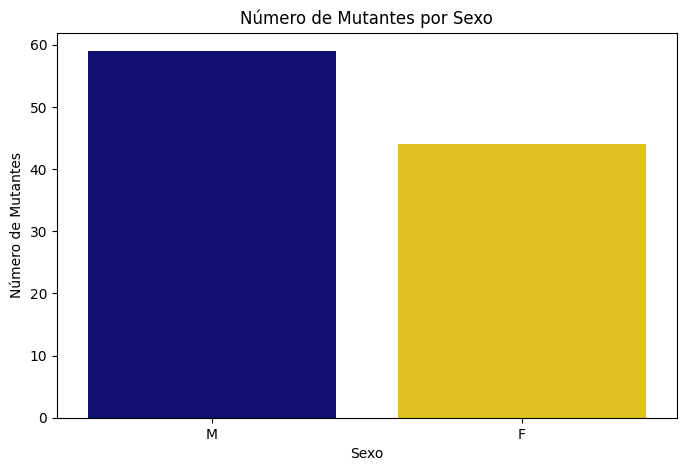

In [12]:
# Contagem de mutantes por sexo
sex_counts = mutants_df['Sex'].value_counts()

# Criar cores personalizadas para cada sexo
colors = ['navy', 'gold']

# Criar gráfico de barras com cores personalizadas
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=colors)
plt.xlabel('Sexo')
plt.ylabel('Número de Mutantes')
plt.title('Número de Mutantes por Sexo')
plt.show()



# **Análise 5: Quantos mutantes por aparição?**

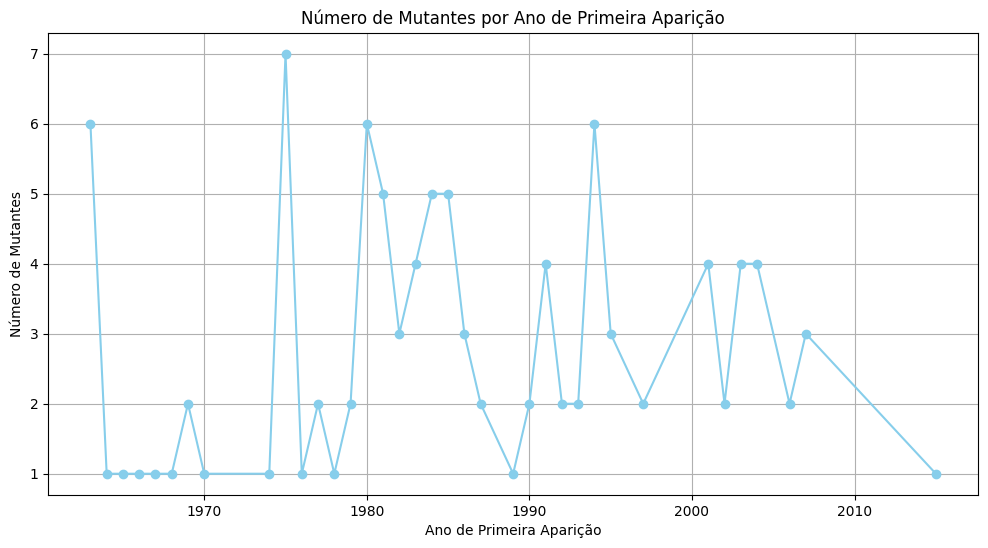

In [6]:
# Contagem de mutantes por ano de primeira aparição
year_counts = mutants_df['FirstAppearanceYear'].value_counts().sort_index()

# Criar gráfico de linhas
plt.figure(figsize=(12, 6))
year_counts.plot(marker='o', color='skyblue')
plt.xlabel('Ano de Primeira Aparição')
plt.ylabel('Número de Mutantes')
plt.title('Número de Mutantes por Ano de Primeira Aparição')
plt.grid(True)
plt.show()
